<a href="https://colab.research.google.com/github/jpantojaj/Credit_Scoring_Specialization/blob/main/Sesi%C3%B3n_17_Taller_Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Configuración: Importamos Librerias y Datos**

In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
cr_loan = pd.read_excel('cr_loan.xlsx',sheet_name='cr_loan')
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## **2. Entendimiento y Análisis Exploratorio de Datos**

### Qué tipo de variables tiene el dataset?

In [3]:
cr_loan.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [4]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
cr_loan.shape

(32581, 12)

### Qué tan material es el nro de defaults?

In [6]:
target_count = cr_loan['loan_status'].value_counts()
target_count

loan_status
0    25473
1     7108
Name: count, dtype: int64

# Buen_Pagador: 25473
# 1 Mora_12M: 7108
Bad rate: 0.21816396059052823


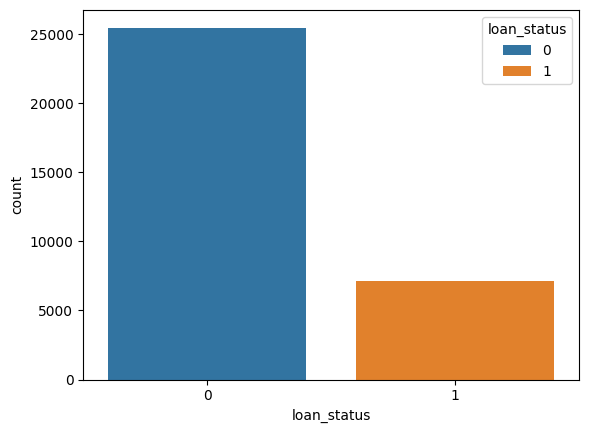

In [7]:
sns.countplot(data = cr_loan, x = "loan_status", hue="loan_status")
target_count = cr_loan.loan_status.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

## Hagamos el Análisis Univariado

#### Revisemos la cantidad de nulos y sus proporciones por variable

In [8]:
null_values = pd.concat([cr_loan.isnull().sum(), cr_loan.isnull().sum() / len(cr_loan)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values

,number_null_values,ratio_null_values
person_age,0,0.000000
person_income,0,0.000000
person_home_ownership,0,0.000000
person_emp_length,895,0.027470
loan_intent,0,0.000000
loan_grade,0,0.000000
loan_amnt,0,0.000000
loan_int_rate,3116,0.095639
loan_status,0,0.000000
loan_percent_income,0,0.000000


#### Hasta aquí sabemos que **person_emp_length (2.7%)** y **loan_int_rate (9.6%)** tienen problemas de missing

#### Revisemos sus estadísticos básicos

In [9]:
cr_loan.select_dtypes(include=['number']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [10]:
cr_loan.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


#### Revisemos como se distribuye cada variable

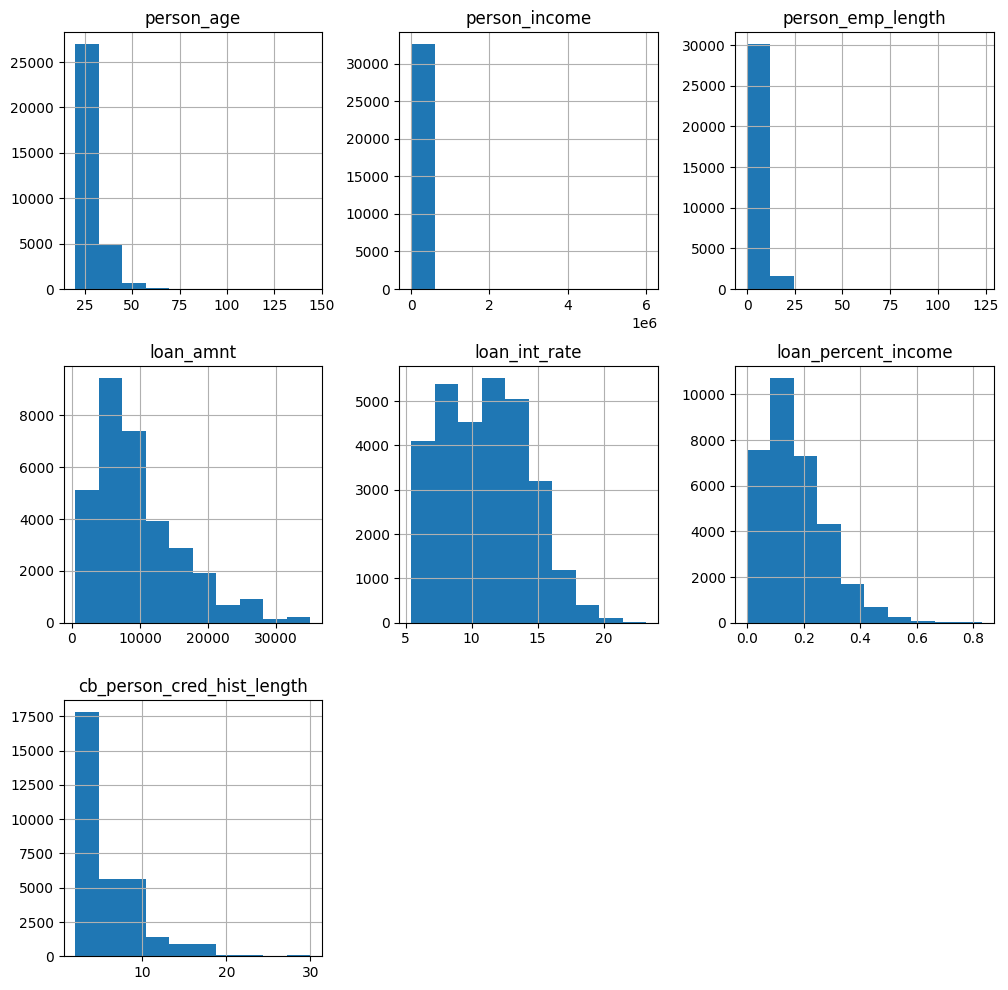

In [11]:
cr_loan.drop(columns = ['loan_status']).hist(figsize = (12, 12))
plt.show()

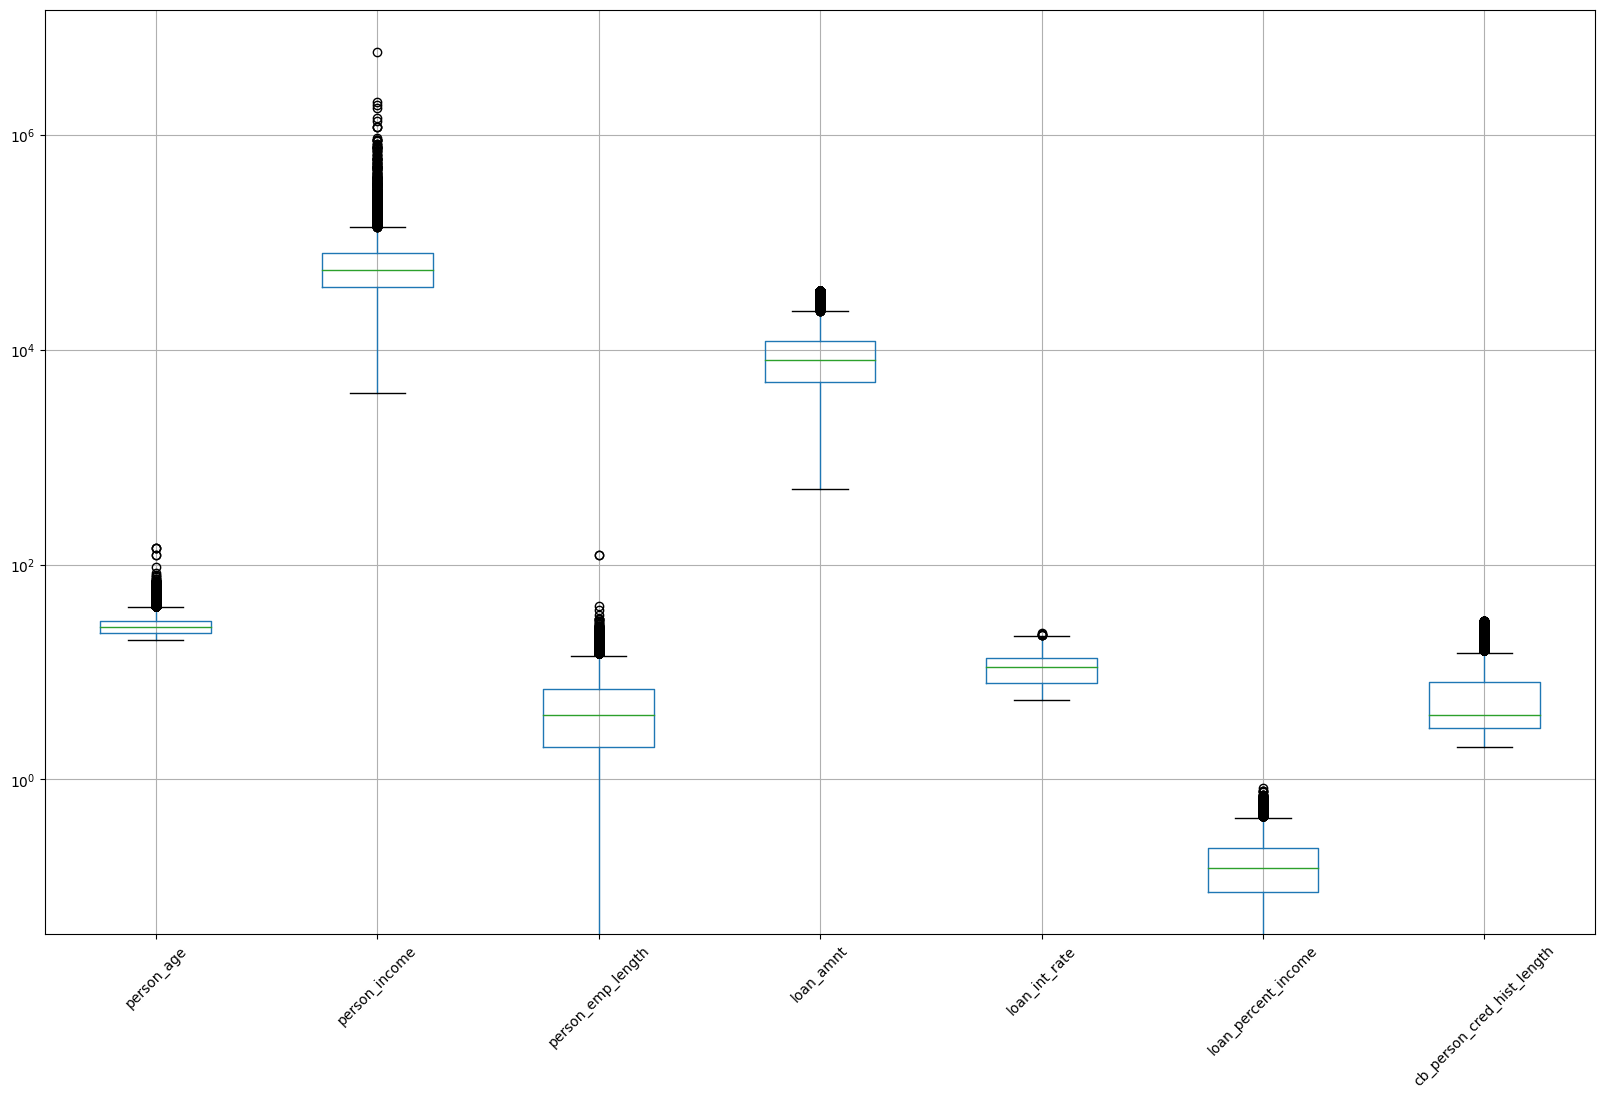

In [12]:
cr_loan.drop(columns = ['loan_status']).boxplot(figsize = (20, 12))
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

In [13]:
def outliers_col(df):
  for columna in df:
    if df[columna].dtype != object:
      q1 = stats.scoreatpercentile(df[columna], 25)
      q3 = stats.scoreatpercentile(df[columna], 75)
      iqr = q3-q1
      lim_inf = q1-3*iqr
      lim_sup = q3+3*iqr
      n_outliers = len(df[(df[columna]<lim_inf) | (df[columna]>lim_sup)])
      print("{} | {} | {}".format(
          df[columna].name,
          n_outliers,
          df[columna].dtype
          ))

In [14]:
outliers_col(cr_loan)

person_age | 249 | int64
person_income | 433 | int64
person_emp_length | 54 | float64
loan_amnt | 192 | int64
loan_int_rate | 0 | float64
loan_status | 7108 | int64
loan_percent_income | 23 | float64
cb_person_cred_hist_length | 149 | int64


## **3. Feature Engineering**

#### Iniciamos haciendo la partición de la muestra

In [15]:
# Para partir las bases
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [16]:
pip install feature_engine

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    cr_loan.drop("loan_status", axis=1),
    cr_loan["loan_status"],
    test_size=0.3,
    random_state=0,
    stratify=cr_loan["loan_status"] #este punto es importante para asegurar un adecuado muestreo de la variable objetivo
)

X_train.shape, X_test.shape

((22806, 11), (9775, 11))

In [18]:
# Comprobación de la proporción de Y en train
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.21814434797860213

In [19]:
# Comprobación de la proporción de Y en test
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])

0.2182097186700767

In [20]:
var_num = X_train.select_dtypes(include = ["number"])
var_num.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [21]:
var_cat = X_train.select_dtypes(exclude = ["number"])
var_cat.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

#### 3.1 Tratamiento de Missing:
####Según el caso elegiremos rellenar estos casos con un valor usualmente conocido (dado el tipo de variable que estemos analizando), o imputar con la mediana o el valor más frecuente, según sea numérica o categórica respectivamente

### Las variables a tratar serían person_emp_length (2.7%) y loan_int_rate (9.6%) tienen problemas de missing

In [22]:
# Llamemos a la librería feature engine
from feature_engine.imputation import MeanMedianImputer

In [23]:
imputer_1 = MeanMedianImputer(imputation_method="median", variables=['person_emp_length','loan_int_rate'])

In [24]:
imputer_1.fit(X_train)

MeanMedianImputer(variables=['person_emp_length', 'loan_int_rate'])

In [25]:
imputer_1.imputer_dict_

{'person_emp_length': 4.0, 'loan_int_rate': 10.99}

In [26]:
X_train_t = imputer_1.transform(X_train)
X_test_t = imputer_1.transform(X_test)

In [27]:
X_train_t.isnull().mean()

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

In [28]:
X_test_t.isnull().mean()

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

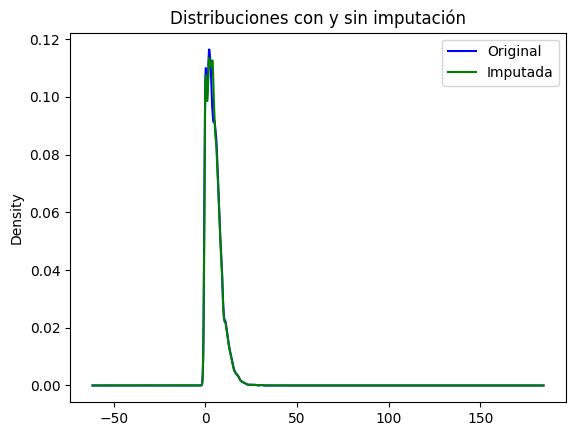

In [29]:
# Grafiquemos las variables imputadas
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['person_emp_length'].plot(kind='kde', ax=ax, color='blue')
X_train_t['person_emp_length'].plot(kind='kde', ax=ax, color='green')

# Agregemos leyendas
lines, labels = ax.get_legend_handles_labels()
labels = ['Original', 'Imputada']
ax.legend(lines, labels, loc='best')
plt.title('Distribuciones con y sin imputación')
plt.show()

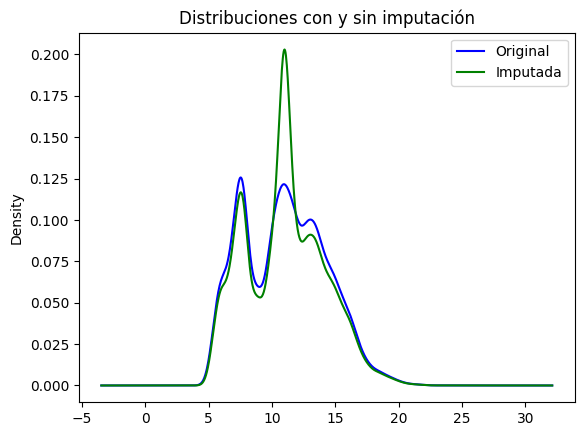

In [30]:
# Grafiquemos las variables imputadas
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['loan_int_rate'].plot(kind='kde', ax=ax, color='blue')
X_train_t['loan_int_rate'].plot(kind='kde', ax=ax, color='green')

# Agregemos leyendas
lines, labels = ax.get_legend_handles_labels()
labels = ['Original', 'Imputada']
ax.legend(lines, labels, loc='best')
plt.title('Distribuciones con y sin imputación')
plt.show()

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

In [32]:
imputer_dt = IterativeImputer(
    estimator=DecisionTreeRegressor(random_state=0),#max_features='sqrt'
    max_iter=100,
    random_state=0)

In [33]:
imputer_dt.fit(X_train[var_num.columns])

IterativeImputer(estimator=DecisionTreeRegressor(random_state=0), max_iter=100,
                 random_state=0)

In [34]:
X_train_dt = imputer_dt.transform(X_train[var_num.columns])
X_test_dt = imputer_dt.transform(X_test[var_num.columns])

In [35]:
X_train_dt = pd.DataFrame(X_train_dt, columns = var_num.columns)
X_test_dt = pd.DataFrame(X_test_dt, columns = var_num.columns)

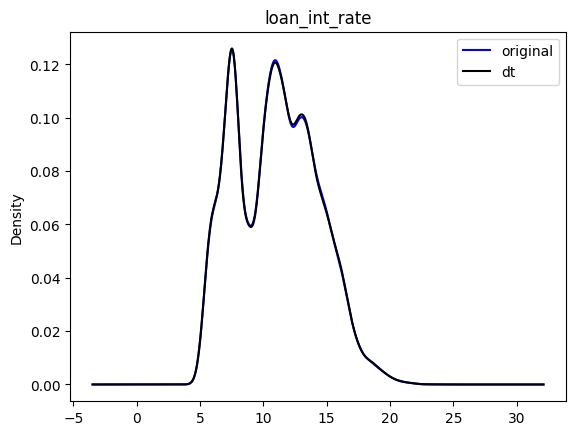

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['loan_int_rate'].plot(kind='kde', ax=ax, color='blue')
X_train_dt['loan_int_rate'].plot(kind='kde', ax=ax, color='black')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['original', 'dt']
ax.legend(lines, labels, loc='best')
plt.title('loan_int_rate')
plt.show()

In [37]:
from sklearn.compose import ColumnTransformer

In [38]:
pipe = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['person_emp_length'])
        ),
         (   "dt_imputer",
            ColumnTransformer(transformers=[('e', IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),max_iter=100,random_state=0), ['loan_int_rate'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

        )
    ]
)

In [39]:
pipe.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['person_emp_length'])),
                ('dt_imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e',
                                                  IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                                                                   max_iter=100,
                                                                   random_state=0),
                                                  ['loan_int_rate'])],
                                   verbose_feature_names_out=False))])

In [40]:
X_train_t_p = pipe.transform(X_train)
X_test_t_p = pipe.transform(X_test)

In [41]:
X_train_t_p.isnull().mean()

loan_int_rate                 0.0
person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

In [42]:
X_test_t_p.isnull().mean()

loan_int_rate                 0.0
person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

In [43]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_age,22806.0,27.682408,6.311037,20.00,23.00,26.00,30.00,144.00
person_income,22806.0,66263.552662,66458.585286,4000.00,38500.00,55000.00,79100.00,6000000.00
person_emp_length,22154.0,4.781710,4.092332,0.00,2.00,4.00,7.00,123.00
loan_amnt,22806.0,9629.821100,6373.170729,500.00,5000.00,8000.00,12500.00,35000.00
loan_int_rate,20619.0,11.003768,3.241859,5.42,7.90,10.99,13.47,23.22
loan_percent_income,22806.0,0.170841,0.107487,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,22806.0,5.776769,4.052736,2.00,3.00,4.00,8.00,30.00


In [44]:
X_train_t_p.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_int_rate,22806.0,11.003768,3.082495,5.42,8.49,11.003768,13.11,23.22
person_age,22806.0,27.682408,6.311037,20.00,23.00,26.000000,30.00,144.00
person_income,22806.0,66263.552662,66458.585286,4000.00,38500.00,55000.000000,79100.00,6000000.00
person_emp_length,22806.0,4.759362,4.035511,0.00,2.00,4.000000,7.00,123.00
loan_amnt,22806.0,9629.821100,6373.170729,500.00,5000.00,8000.000000,12500.00,35000.00
loan_percent_income,22806.0,0.170841,0.107487,0.00,0.09,0.150000,0.23,0.83
cb_person_cred_hist_length,22806.0,5.776769,4.052736,2.00,3.00,4.000000,8.00,30.00


### 3.2 Tratamiento de Valores Raros o Poco frecuentes
En este punto, nos detenemos para revisar problemas de cardinalidad y si existen valores raros o poco frecuentes en nuestras variables categóricas

In [45]:
# Examinemos esto en la muestra de train
for col in var_cat.columns:
    print('variable: ', col, ' nro de categorias: ', X_train_t[col].nunique())

variable:  person_home_ownership  nro de categorias:  4
variable:  loan_intent  nro de categorias:  6
variable:  loan_grade  nro de categorias:  7
variable:  cb_person_default_on_file  nro de categorias:  2


In [46]:
#Examinemos esto en la muestra de test
for col in var_cat.columns:
    print('variable: ', col, ' nro de categorias: ', X_test_t[col].nunique())

variable:  person_home_ownership  nro de categorias:  4
variable:  loan_intent  nro de categorias:  6
variable:  loan_grade  nro de categorias:  7
variable:  cb_person_default_on_file  nro de categorias:  2


In [47]:
# Analicemos la variable person_home_ownership
unique_to_train_set = [x for x in X_train_t.person_home_ownership.unique() if x not in X_test_t.person_home_ownership.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.person_home_ownership.unique() if x not in X_train_t.person_home_ownership.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [48]:
# Analicemos la variable loan_grade
unique_to_train_set = [x for x in X_train_t.loan_grade.unique() if x not in X_test_t.loan_grade.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.loan_grade.unique() if x not in X_train_t.loan_grade.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [49]:
# Analicemos la variable loan_intent
unique_to_train_set = [x for x in X_train_t.loan_intent.unique() if x not in X_test_t.loan_intent.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.loan_intent.unique() if x not in X_train_t.loan_intent.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [50]:
# Analicemos la variable cb_person_default_on_file
unique_to_train_set = [x for x in X_train_t.cb_person_default_on_file.unique() if x not in X_test_t.cb_person_default_on_file.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.cb_person_default_on_file.unique() if x not in X_train_t.cb_person_default_on_file.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


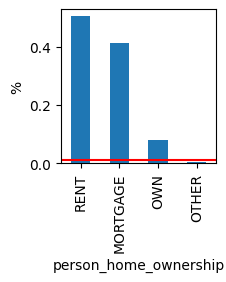

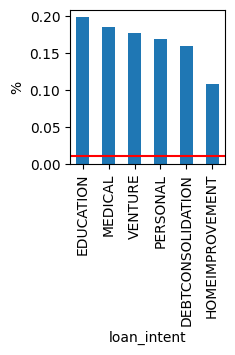

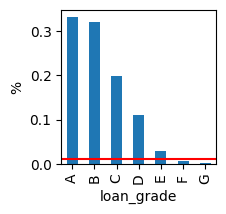

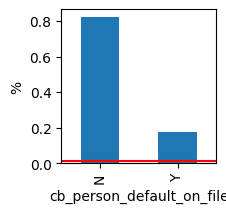

In [51]:
total = len(X_train_t)
for col in var_cat.columns:
    temp_df = pd.Series(X_train_t[col].value_counts() / total)
    fig = temp_df.sort_values(ascending=False).plot.bar(figsize=(2,2))
    fig.set_xlabel(col)
    fig.axhline(y=0.01, color='red')
    fig.set_ylabel('%')
    plt.show()

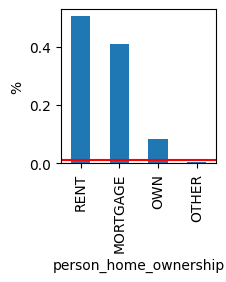

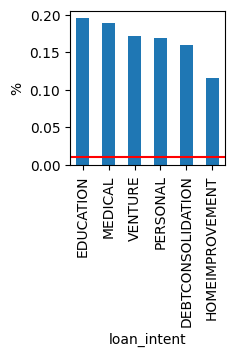

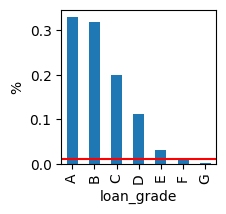

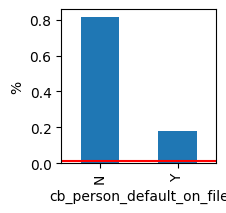

In [52]:
total = len(X_test_t)
for col in var_cat.columns:
    temp_df = pd.Series(X_test_t[col].value_counts() / total)
    fig = temp_df.sort_values(ascending=False).plot.bar(figsize=(2,2))
    fig.set_xlabel(col)
    fig.axhline(y=0.01, color='red')
    fig.set_ylabel('%')
    plt.show()

#### En esta sección no vamos a realizar ningún tratamiento de casos raros dado que la cardinalidad es baja

### Tratamiento de outliers

In [53]:
X_train_t_p.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_int_rate,22806.0,11.003768,3.082495,5.42,8.49,11.003768,13.11,23.22
person_age,22806.0,27.682408,6.311037,20.00,23.00,26.000000,30.00,144.00
person_income,22806.0,66263.552662,66458.585286,4000.00,38500.00,55000.000000,79100.00,6000000.00
person_emp_length,22806.0,4.759362,4.035511,0.00,2.00,4.000000,7.00,123.00
loan_amnt,22806.0,9629.821100,6373.170729,500.00,5000.00,8000.000000,12500.00,35000.00
loan_percent_income,22806.0,0.170841,0.107487,0.00,0.09,0.150000,0.23,0.83
cb_person_cred_hist_length,22806.0,5.776769,4.052736,2.00,3.00,4.000000,8.00,30.00


In [54]:
outliers_col(X_train_t_p)

loan_int_rate | 0 | float64
person_age | 175 | int64
person_income | 309 | int64
person_emp_length | 39 | float64
loan_amnt | 0 | int64
loan_percent_income | 16 | float64
cb_person_cred_hist_length | 107 | int64


### Revisando los casos, vamos a tratar los outliers, **person_age** y **person_emp_length** y **cb_person_cred_hist_length** sobre su cola derecha, y **person_income** sobre sus dos colas

In [55]:
from feature_engine.outliers import Winsorizer
capper_1 = Winsorizer(
    variables=['person_age','person_emp_length','cb_person_cred_hist_length'],
    capping_method="quantiles",
    tail="right",
    fold=0.01,
)
capper_1.fit(X_train_t_p)

Winsorizer(capping_method='quantiles', fold=0.01,
           variables=['person_age', 'person_emp_length',
                      'cb_person_cred_hist_length'])

In [56]:
X_train_t_p2 = capper_1.transform(X_train_t_p)
X_test_t_p2 = capper_1.transform(X_test_t_p)

In [57]:
capper_2 = Winsorizer(
    variables=['person_income'],
    capping_method="quantiles",
    tail="both",
    fold=0.01,
)
capper_2.fit(X_train_t_p2)

Winsorizer(capping_method='quantiles', fold=0.01, tail='both',
           variables=['person_income'])

In [58]:
X_train_t_p3 = capper_2.transform(X_train_t_p2)
X_test_t_p3 = capper_2.transform(X_test_t_p2)

In [59]:
X_train_t_p3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_int_rate,22806.0,11.003768,3.082495,5.42,8.49,11.003768,13.11,23.22
person_age,22806.0,27.609357,5.899802,20.00,23.00,26.000000,30.00,50.00
person_income,22806.0,64420.508156,37903.090645,14000.00,38500.00,55000.000000,79100.00,227375.00
person_emp_length,22806.0,4.720205,3.819609,0.00,2.00,4.000000,7.00,17.00
loan_amnt,22806.0,9629.821100,6373.170729,500.00,5000.00,8000.000000,12500.00,35000.00
loan_percent_income,22806.0,0.170841,0.107487,0.00,0.09,0.150000,0.23,0.83
cb_person_cred_hist_length,22806.0,5.716873,3.811986,2.00,3.00,4.000000,8.00,17.00


In [60]:
X_test_t_p3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_int_rate,9775.0,11.027661,3.079623,5.42,8.49,11.003768,13.11,22.48
person_age,9775.0,27.776266,5.954569,20.00,23.00,26.000000,30.00,50.00
person_income,9775.0,64305.276624,37760.169693,14000.00,38498.00,55000.000000,79784.00,227375.00
person_emp_length,9775.0,4.746087,3.918233,0.00,2.00,4.000000,7.00,17.00
loan_amnt,9775.0,9494.997442,6200.563180,500.00,5000.00,8000.000000,12000.00,35000.00
loan_percent_income,9775.0,0.168717,0.105108,0.00,0.09,0.150000,0.23,0.77
cb_person_cred_hist_length,9775.0,5.809003,3.830889,2.00,3.00,4.000000,8.00,17.00


### Escalado de las variables

In [61]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(X_train_t_p3[var_num.columns])
X_train_t_p4 = scaler.transform(X_train_t_p3[var_num.columns])
X_test_t_p4 = scaler.transform(X_test_t_p3[var_num.columns])

In [62]:
X_train_t_p4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_age,22806.0,2.299082e-01,0.842829,-0.857143,-0.428571,0.0,0.571429,3.428571
person_income,22806.0,2.320322e-01,0.933574,-1.009852,-0.406404,0.0,0.593596,4.245690
person_emp_length,22806.0,1.440410e-01,0.763922,-0.800000,-0.400000,0.0,0.600000,2.600000
loan_amnt,22806.0,2.173095e-01,0.849756,-1.000000,-0.400000,0.0,0.600000,3.600000
loan_int_rate,22806.0,5.140733e-18,0.667207,-1.208608,-0.544106,0.0,0.455894,2.644206
loan_percent_income,22806.0,1.488612e-01,0.767765,-1.071429,-0.428571,0.0,0.571429,4.857143
cb_person_cred_hist_length,22806.0,3.433746e-01,0.762397,-0.400000,-0.200000,0.0,0.800000,2.600000


#### Actualizamos nuestro pipeline

In [63]:
pipe_2 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['person_emp_length'])
        ),
        (
            "dt_imputer",
            ColumnTransformer(transformers=[('e', IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),max_iter=100,random_state=0), ['loan_int_rate'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        ),
        (
            "capper_1",
         Winsorizer(variables=['person_age','person_emp_length','cb_person_cred_hist_length'],capping_method="quantiles",tail="right",fold=0.01)
        ),
        (
            "capper_2",
         Winsorizer(variables=['person_income'], capping_method="quantiles", tail="both", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        )
    ]
)

In [64]:
pipe_2.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['person_emp_length'])),
                ('dt_imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e',
                                                  IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                                                                   max_iter=100,
                                                                   random_state=0),
                                                  ['loan_int_rate'])],
                                   verbose_feature_names_out=False)),
                ('capper_1',
                 Winsorizer(capping_method='qu...
                ('capper_2',
                 Winsorizer(capping_method='quantiles', fold=0.01, tail='both',
                            variables=['person_income'])),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e', RobustScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length'])],
                                   verbose_feature_names_out=False))])

In [65]:
X_train_t_p5 = pipe_2.transform(X_train)
X_test_t_p5 = pipe_2.transform(X_test)

In [66]:
X_train_t_p4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_age,22806.0,2.299082e-01,0.842829,-0.857143,-0.428571,0.0,0.571429,3.428571
person_income,22806.0,2.320322e-01,0.933574,-1.009852,-0.406404,0.0,0.593596,4.245690
person_emp_length,22806.0,1.440410e-01,0.763922,-0.800000,-0.400000,0.0,0.600000,2.600000
loan_amnt,22806.0,2.173095e-01,0.849756,-1.000000,-0.400000,0.0,0.600000,3.600000
loan_int_rate,22806.0,5.140733e-18,0.667207,-1.208608,-0.544106,0.0,0.455894,2.644206
loan_percent_income,22806.0,1.488612e-01,0.767765,-1.071429,-0.428571,0.0,0.571429,4.857143
cb_person_cred_hist_length,22806.0,3.433746e-01,0.762397,-0.400000,-0.200000,0.0,0.800000,2.600000


In [67]:
X_train_t_p5.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_age,22806.0,2.299082e-01,0.842829,-0.857143,-0.428571,0.0,0.571429,3.428571
person_income,22806.0,2.320322e-01,0.933574,-1.009852,-0.406404,0.0,0.593596,4.245690
person_emp_length,22806.0,1.440410e-01,0.763922,-0.800000,-0.400000,0.0,0.600000,2.600000
loan_amnt,22806.0,2.173095e-01,0.849756,-1.000000,-0.400000,0.0,0.600000,3.600000
loan_int_rate,22806.0,5.140733e-18,0.667207,-1.208608,-0.544106,0.0,0.455894,2.644206
loan_percent_income,22806.0,1.488612e-01,0.767765,-1.071429,-0.428571,0.0,0.571429,4.857143
cb_person_cred_hist_length,22806.0,3.433746e-01,0.762397,-0.400000,-0.200000,0.0,0.800000,2.600000


## **4. Feature Selection**
Ahora, podemos determinar cuanto aportan estas variables? para esto calculemos su IV

#### Empecemos discretizando las variables numéricas

In [68]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [69]:
disc1 = EqualFrequencyDiscretiser(q=5,variables=list(var_num.columns),return_boundaries=True)
disc1.fit(X_train_t_p5[var_num.columns])

EqualFrequencyDiscretiser(q=5, return_boundaries=True,
                          variables=['person_age', 'person_income',
                                     'person_emp_length', 'loan_amnt',
                                     'loan_int_rate', 'loan_percent_income',
                                     'cb_person_cred_hist_length'])

In [70]:
X_train_t_p5_numdisc=disc1.transform(X_train_t_p5[var_num.columns])
X_test_t_p5_numdisc=disc1.transform(X_test_t_p5[var_num.columns])

In [71]:
X_train_t_p5_numdisc.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
28790,"(0.857, inf]","(-0.493, -0.148]","(0.8, inf]","(-inf, -0.49]","(-inf, -0.706]","(-inf, -0.5]","(0.2, 1.0]"
1311,"(-inf, -0.429]","(-0.148, 0.197]","(-inf, -0.6]","(0.93, inf]","(0.564, inf]","(0.214, 0.714]","(-inf, -0.2]"
5233,"(-0.429, -0.143]","(-0.148, 0.197]","(-0.6, -0.2]","(-0.16, 0.267]","(-inf, -0.706]","(-0.214, 0.214]","(-inf, -0.2]"
17693,"(-0.143, 0.143]","(-0.148, 0.197]","(-inf, -0.6]","(-inf, -0.49]","(-0.706, -0.0896]","(-inf, -0.5]","(-inf, -0.2]"
10132,"(-0.429, -0.143]","(-inf, -0.493]","(0.8, inf]","(-0.16, 0.267]","(0.105, 0.564]","(0.714, inf]","(-0.2, 0.0]"


In [72]:
tot_train_t=pd.concat([X_train_t_p5_numdisc, X_train_t_p5[var_cat.columns], y_train], axis=1)
tot_train_t.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,loan_status
28790,"(0.857, inf]","(-0.493, -0.148]","(0.8, inf]","(-inf, -0.49]","(-inf, -0.706]","(-inf, -0.5]","(0.2, 1.0]",OWN,HOMEIMPROVEMENT,A,N,0
1311,"(-inf, -0.429]","(-0.148, 0.197]","(-inf, -0.6]","(0.93, inf]","(0.564, inf]","(0.214, 0.714]","(-inf, -0.2]",RENT,EDUCATION,D,N,1
5233,"(-0.429, -0.143]","(-0.148, 0.197]","(-0.6, -0.2]","(-0.16, 0.267]","(-inf, -0.706]","(-0.214, 0.214]","(-inf, -0.2]",RENT,MEDICAL,A,N,0
17693,"(-0.143, 0.143]","(-0.148, 0.197]","(-inf, -0.6]","(-inf, -0.49]","(-0.706, -0.0896]","(-inf, -0.5]","(-inf, -0.2]",RENT,DEBTCONSOLIDATION,A,N,0
10132,"(-0.429, -0.143]","(-inf, -0.493]","(0.8, inf]","(-0.16, 0.267]","(0.105, 0.564]","(0.714, inf]","(-0.2, 0.0]",RENT,PERSONAL,B,N,1


#### Ahora las funciones necesarias para calcular el WOE por atributo y el IV por variable

In [73]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [74]:
def getFeatureIV_Importance(df,features,target):
    featureIV_Importance=list()
    for v in features:
      iv, rep=calculate_woe_iv(df,v,target)
      featureIV_Importance.append(iv)
    display(pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False))

In [75]:
getFeatureIV_Importance(tot_train_t,tot_train_t.columns,"loan_status")

,Feature,IV
9,loan_grade,0.803946
5,loan_percent_income,0.719900
4,loan_int_rate,0.575580
1,person_income,0.455308
7,person_home_ownership,0.392905
10,cb_person_default_on_file,0.164408
8,loan_intent,0.092528
3,loan_amnt,0.075910
2,person_emp_length,0.047622
6,cb_person_cred_hist_length,0.006705


### A partir de esto, nos quedamos con las variables que tengan un IV mayor a 2% (que es el umbral mínimo) y menor a 50% (umbral máximo antes de ser considerado sospechosa)

In [76]:
sel_vars=['loan_percent_income','loan_int_rate','person_income','person_home_ownership','cb_person_default_on_file',
          'loan_intent','loan_amnt','person_emp_length']

#### Veamos como se ven las relaciones entre los atributos de cada variable y el log(odds) o WOE

In [77]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('WOE')
    plt.title(str('WOE por ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [78]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t, 'loan_percent_income', 'loan_status')

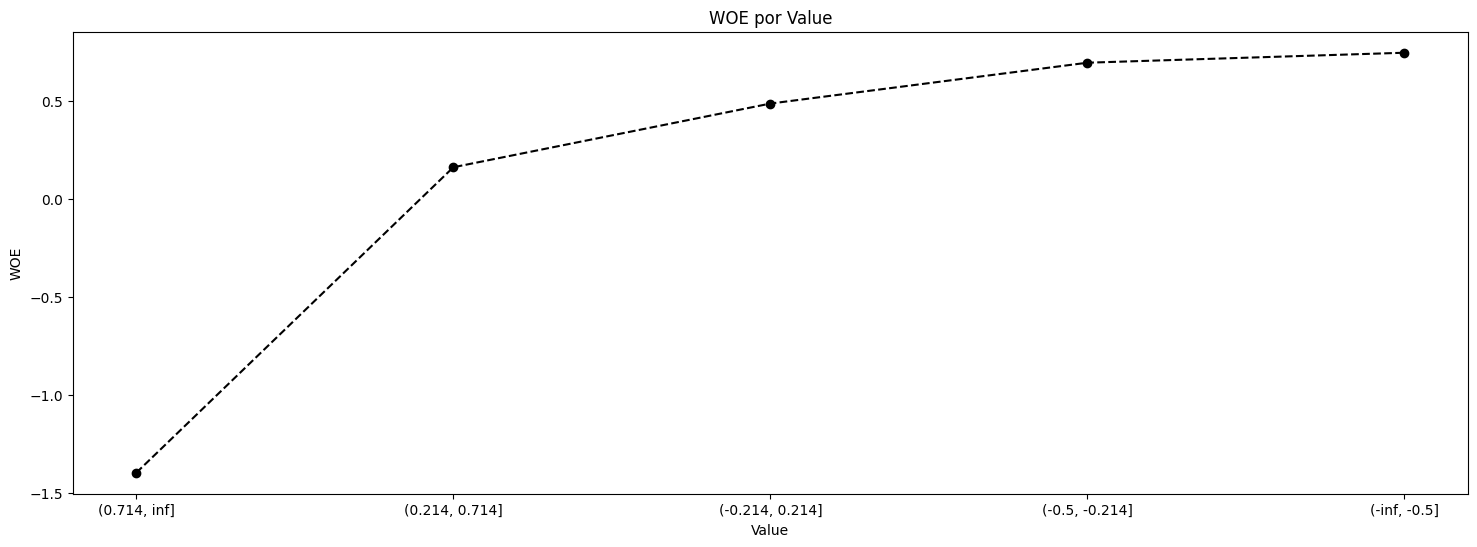

In [79]:
plot_by_woe(ReporteWoe_v1)

In [80]:
IV_v2, ReporteWoe_v2=calculate_woe_iv(tot_train_t, 'loan_int_rate', 'loan_status')

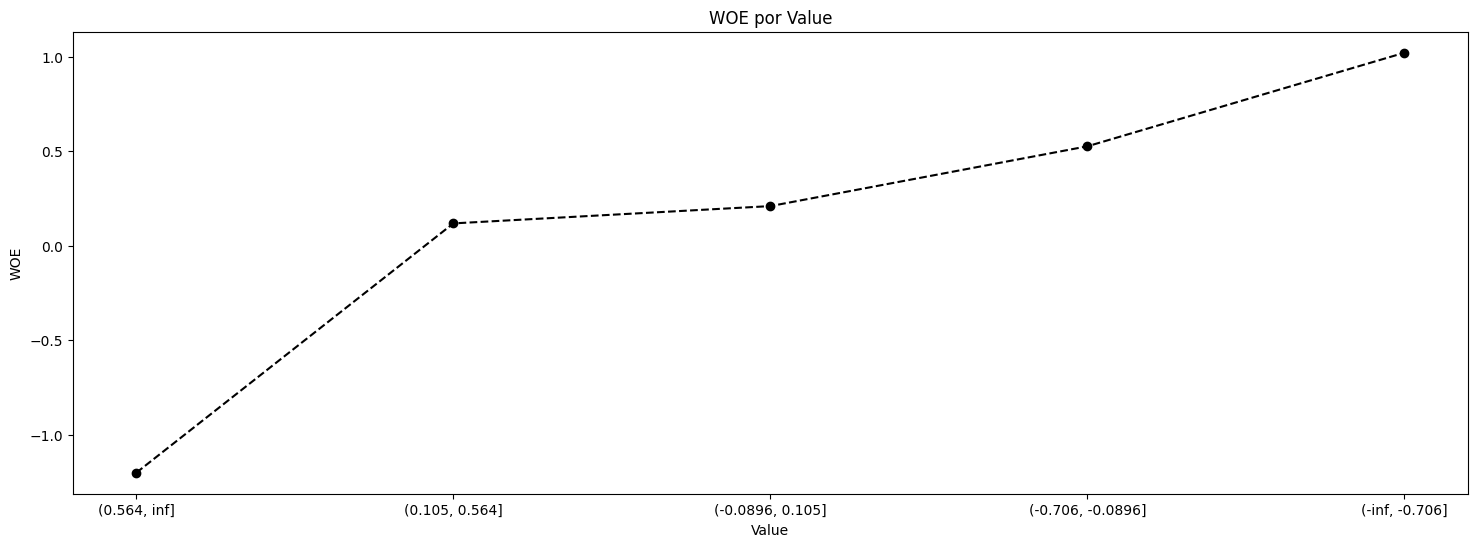

In [81]:
plot_by_woe(ReporteWoe_v2)

In [82]:
IV_v3, ReporteWoe_v3=calculate_woe_iv(tot_train_t, 'person_income', 'loan_status')

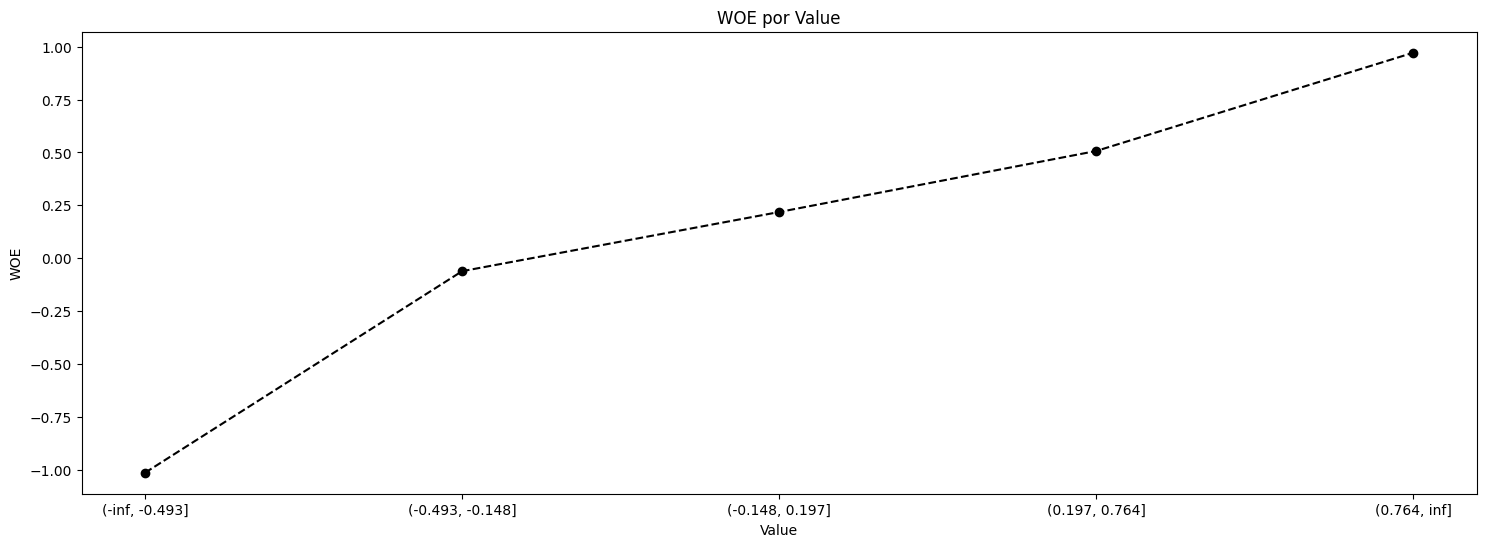

In [83]:
plot_by_woe(ReporteWoe_v3)

In [84]:
IV_v4, ReporteWoe_v4=calculate_woe_iv(tot_train_t, 'person_home_ownership', 'loan_status')

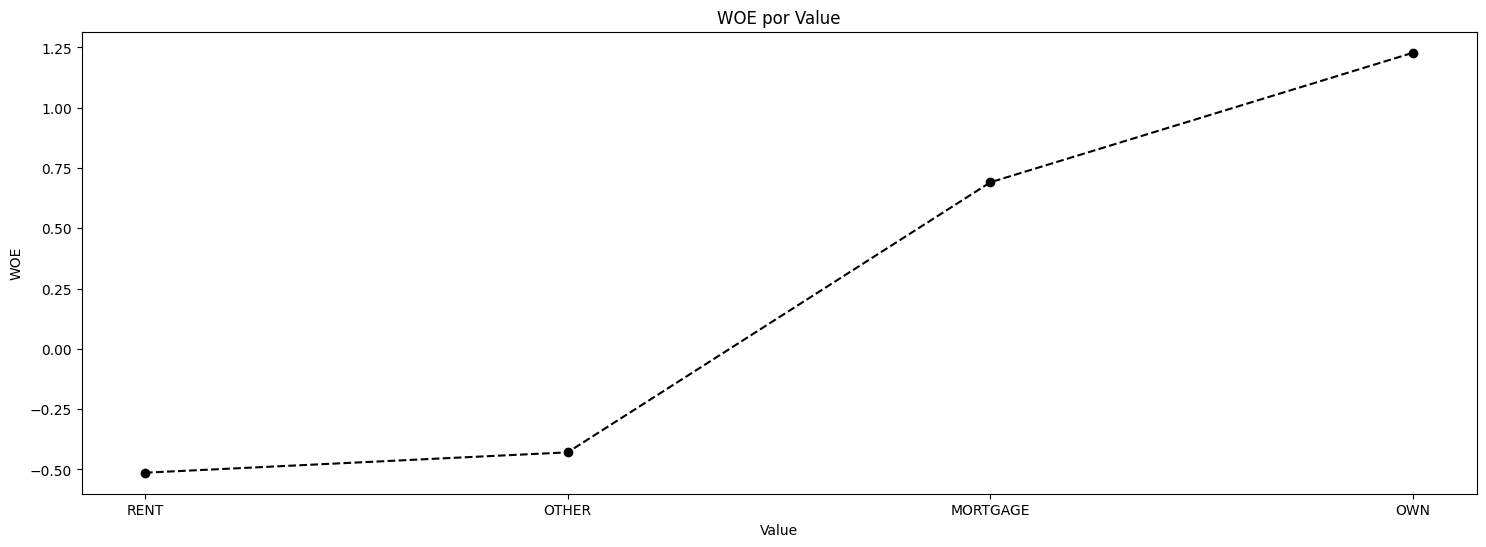

In [85]:
plot_by_woe(ReporteWoe_v4)

In [86]:
IV_v5, ReporteWoe_v5=calculate_woe_iv(tot_train_t, 'cb_person_default_on_file', 'loan_status')

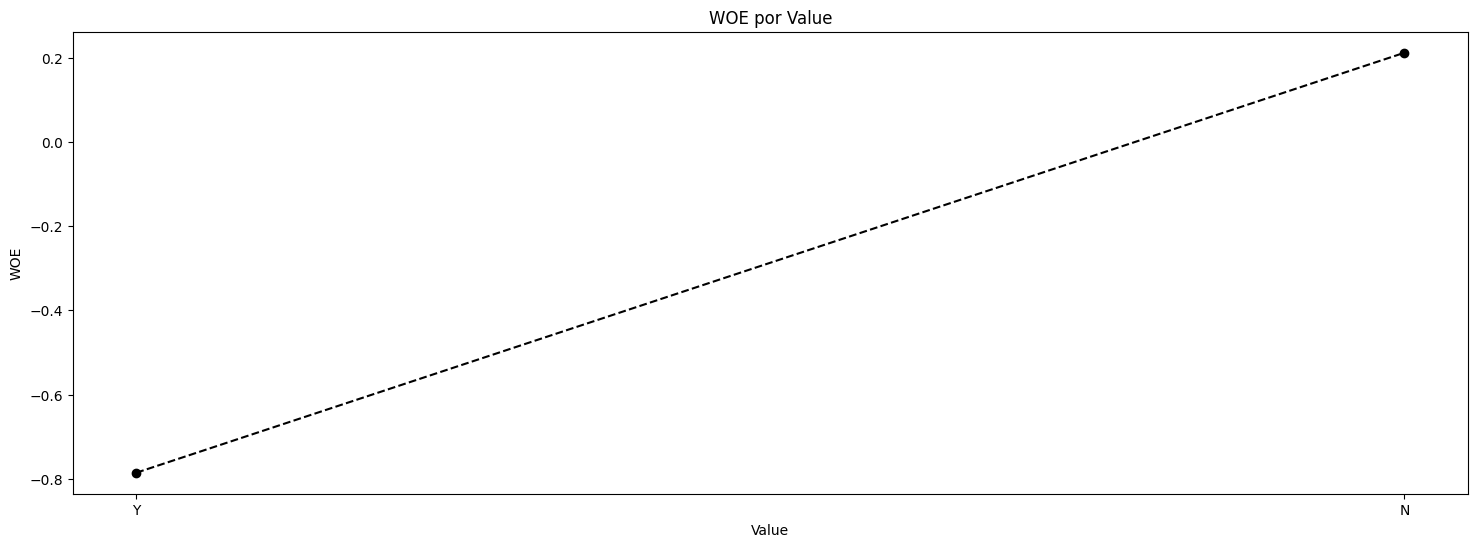

In [87]:
plot_by_woe(ReporteWoe_v5)

In [88]:
IV_v6, ReporteWoe_v6=calculate_woe_iv(tot_train_t, 'loan_intent', 'loan_status')

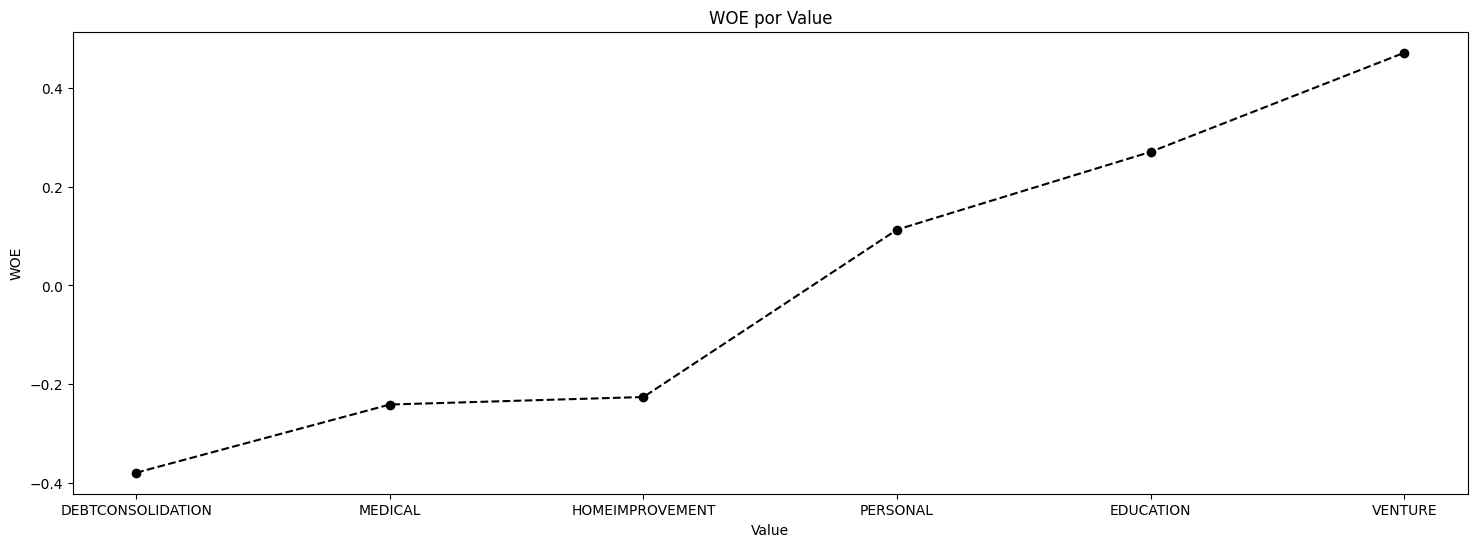

In [89]:
plot_by_woe(ReporteWoe_v6)

In [90]:
IV_v7, ReporteWoe_v7=calculate_woe_iv(tot_train_t, 'loan_amnt', 'loan_status')

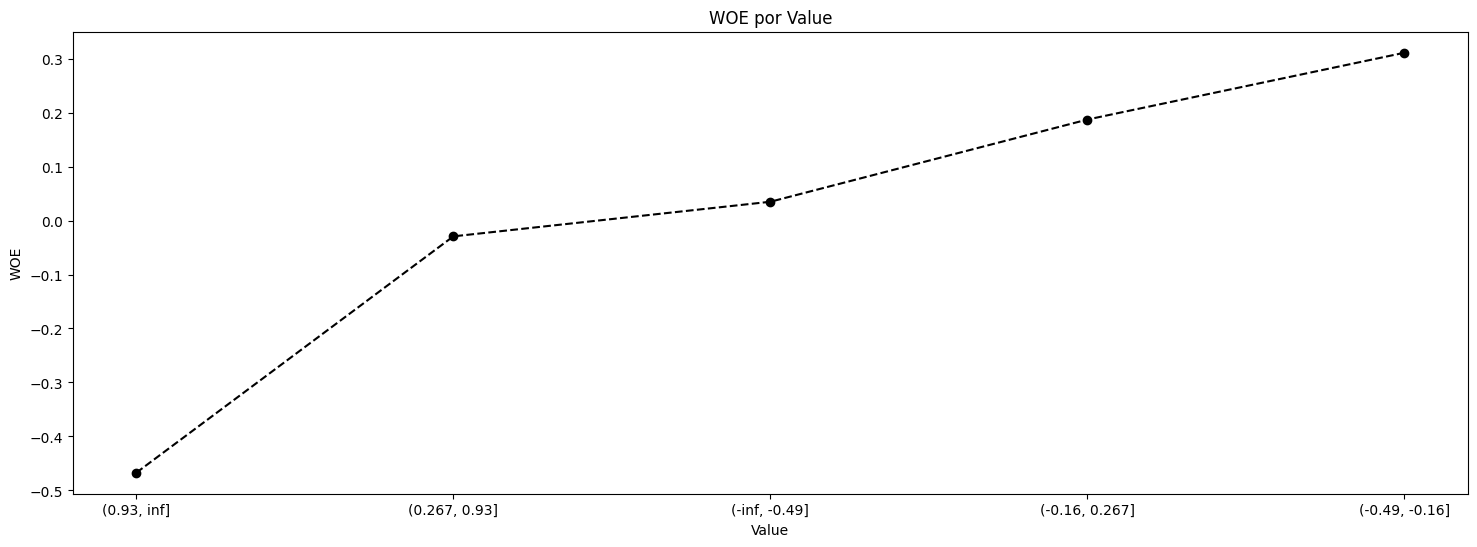

In [91]:
plot_by_woe(ReporteWoe_v7)

In [92]:
IV_v8, ReporteWoe_v8=calculate_woe_iv(tot_train_t, 'person_emp_length', 'loan_status')

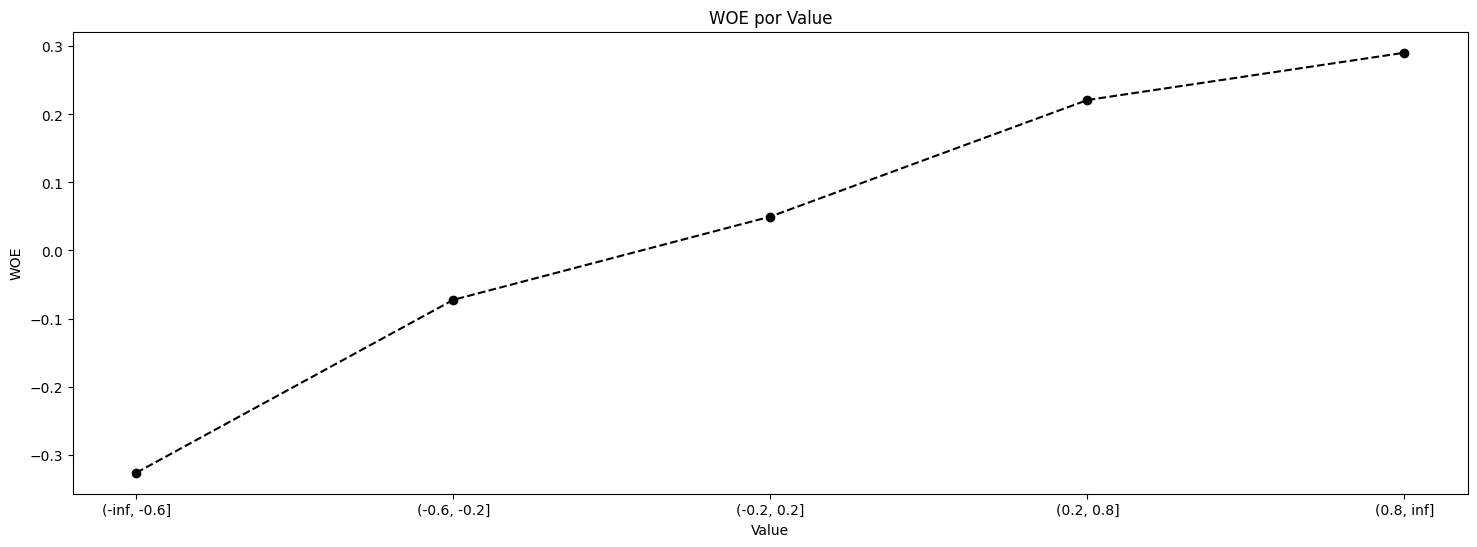

In [93]:
plot_by_woe(ReporteWoe_v8)

#### Codificamos las variables categóricas para ingresarlas al modelo

In [94]:
sel_vars

['loan_percent_income',
 'loan_int_rate',
 'person_income',
 'person_home_ownership',
 'cb_person_default_on_file',
 'loan_intent',
 'loan_amnt',
 'person_emp_length']

In [95]:
sel_vars_cat=['person_home_ownership','cb_person_default_on_file','loan_intent']

In [96]:
sel_vars_num=['loan_percent_income','loan_int_rate','person_income','loan_amnt','person_emp_length']

In [97]:
from feature_engine.encoding import WoEEncoder

In [98]:
encoder_1 = WoEEncoder(variables=sel_vars_cat,
                       fill_value=0) #ignore_format=False
encoder_1.fit(X_train_t_p5[sel_vars_cat], y_train)

WoEEncoder(fill_value=0,
           variables=['person_home_ownership', 'cb_person_default_on_file',
                      'loan_intent'])

In [99]:
X_train_t_p5_cat_woe_enc = encoder_1.transform(X_train_t_p5[sel_vars_cat])
X_test_t_p5_cat_woe_enc = encoder_1.transform(X_test_t_p5[sel_vars_cat])

In [100]:
X_train_t_p5_cat_woe_enc.head()

,person_home_ownership,cb_person_default_on_file,loan_intent
28790,-1.227954,-0.212103,0.225833
1311,0.513736,-0.212103,-0.270542
5233,0.513736,-0.212103,0.241034
17693,0.513736,-0.212103,0.379096
10132,0.513736,-0.212103,-0.113010


In [101]:
encoder_2 = WoEEncoder(variables=sel_vars_num,
                       fill_value=0) #ignore_format=False
encoder_2.fit(X_train_t_p5_numdisc[sel_vars_num], y_train)

WoEEncoder(fill_value=0,
           variables=['loan_percent_income', 'loan_int_rate', 'person_income',
                      'loan_amnt', 'person_emp_length'])

In [102]:
X_train_t_p5_num_woe_enc = encoder_2.transform(X_train_t_p5_numdisc[sel_vars_num])
X_test_t_p5_num_woe_enc = encoder_2.transform(X_test_t_p5_numdisc[sel_vars_num])

In [103]:
X_train_t_p5_num_woe_enc.head()

,loan_percent_income,loan_int_rate,person_income,loan_amnt,person_emp_length
28790,-0.747716,-1.021987,0.061396,-0.034800,-0.290629
1311,-0.162425,1.200290,-0.218478,0.467245,0.326625
5233,-0.487915,-1.021987,-0.218478,-0.187095,0.072540
17693,-0.747716,-0.526954,-0.218478,-0.034800,0.326625
10132,1.398710,-0.118935,1.014568,-0.187095,-0.290629


### Análisis de Correlaciones
En este punto, verifiquemos si existe correlación en las variables predictoras que hemos elegido, con el fin de depurarlas

In [104]:
# Creemos una función para identificar de manera masiva a las variables correlacionadas, en caso de tener un mayor volumen de variables
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr(method='pearson')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [105]:
corr_features = correlation(X_train_t_p5[sel_vars_num], 0.5)
len(set(corr_features))

0.576497384823545 loan_amnt loan_percent_income


1

<Axes: >

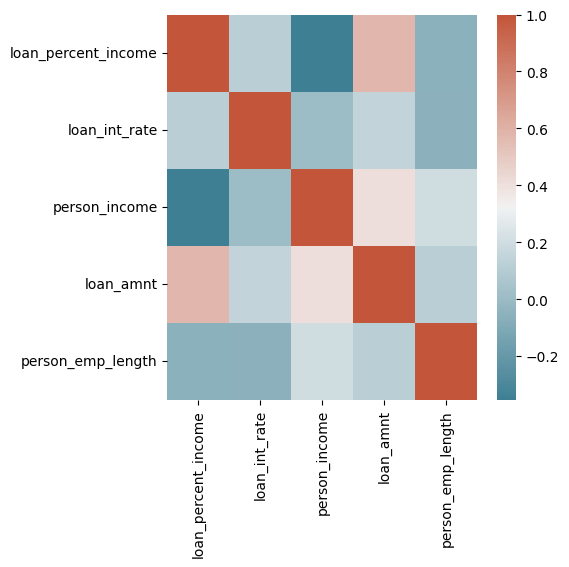

In [106]:
corrmat2 = X_train_t_p5[sel_vars_num].corr(method='pearson')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.heatmap(corrmat2, cmap=cmap)

### Con lo visto en este análisis de correlaciones, vamos a quedarnos solo con una de estas variables, que será la de mayor IV, es decir, **loan_percent_income**

In [107]:
sel_vars_2=['loan_percent_income','loan_int_rate','person_income','person_home_ownership','cb_person_default_on_file',
            'loan_intent','person_emp_length']

In [108]:
sel_vars_num_2=['loan_percent_income','loan_int_rate','person_income','person_emp_length']

### Actualicemos nuestro pipeline de Feature Engineering antes de iniciar el entrenamiento del modelo

In [109]:
pipe_3 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['person_emp_length'])
        ),
        (
            "dt_imputer",
            ColumnTransformer(transformers=[('e', IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),max_iter=100,random_state=0), ['loan_int_rate'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        ),
        (
            "capper_1",
         Winsorizer(variables=['person_age','person_emp_length','cb_person_cred_hist_length'],capping_method="quantiles",tail="right",fold=0.01)
        ),
        (
            "capper_2",
         Winsorizer(variables=['person_income'], capping_method="quantiles", tail="both", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])],
                              remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        ),
        (
            "encoder_1",
            WoEEncoder(variables=['person_home_ownership', 'loan_intent', 'loan_grade','cb_person_default_on_file'], fill_value=0)
        ),
    ]
)

In [110]:
pipe_3.fit(X_train,y_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['person_emp_length'])),
                ('dt_imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e',
                                                  IterativeImputer(estimator=DecisionTreeRegressor(random_state=0),
                                                                   max_iter=100,
                                                                   random_state=0),
                                                  ['loan_int_rate'])],
                                   verbose_feature_names_out=False)),
                ('capper_1',
                 Winsorizer(capping_method='qu...
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e', RobustScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length'])],
                                   verbose_feature_names_out=False)),
                ('encoder_1',
                 WoEEncoder(fill_value=0,
                            variables=['person_home_ownership', 'loan_intent',
                                       'loan_grade',
                                       'cb_person_default_on_file']))])

In [111]:
X_train_t_p6 = pipe_3.transform(X_train)
X_test_t_p6 = pipe_3.transform(X_test)

## **5. Entrenamiento del Modelo**
En esta sección construiremos tres tipos de modelos y los evaluaremos para quedarnos con el mejor de ellos

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [113]:
logit = LogisticRegression()
logit.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_logit = logit.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_logit = logit.predict_proba(X_test_t_p6[sel_vars_2])
print('Logit Train roc_auc: ', roc_auc_score(y_train, pred_train_logit[:,1]), 'Logit Train GINI: ', 2*roc_auc_score(y_train, pred_train_logit[:,1])-1)
print('Logit Test roc_auc: ', roc_auc_score(y_test, pred_test_logit[:,1]), 'Logit Test GINI: ', 2*roc_auc_score(y_test, pred_test_logit[:,1])-1)

Logit Train roc_auc:  0.8437452531007907 Logit Train GINI:  0.6874905062015815
Logit Test roc_auc:  0.8469446367711783 Logit Test GINI:  0.6938892735423565


In [114]:
rf = RandomForestClassifier(n_estimators=300, random_state=39)
rf.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_rf = rf.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_rf = rf.predict_proba(X_test_t_p6[sel_vars_2])
print('RF Train roc_auc: ', roc_auc_score(y_train, pred_train_rf[:,1]), 'RF Train GINI: ', 2*roc_auc_score(y_train, pred_train_rf[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)

RF Train roc_auc:  0.9999999943636075 RF Train GINI:  0.9999999887272151
RF Test roc_auc:  0.9270927387854496 RF Test GINI:  0.8541854775708992


In [115]:
gbc = GradientBoostingClassifier(n_estimators=300, random_state=44)
gbc.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_gbc = gbc.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_gbc = gbc.predict_proba(X_test_t_p6[sel_vars_2])
print('GBC Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]), 'GBC Train GINI: ', 2*roc_auc_score(y_train, pred_train_gbc[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

GBC Train roc_auc:  0.9490335869803845 GBC Train GINI:  0.8980671739607691
GBC Test roc_auc:  0.9349358966100556 GBC Test GINI:  0.8698717932201112


## **Optimización de Hiperparámetros**

In [117]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split, RandomizedSearchCV

### **Random Forest**

In [118]:
# Seteamos el modelo
rf = RandomForestClassifier(random_state=39)

# Definimos el espacio de hiperparámetros
rf_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# Búsqueda
reg_rf = RandomizedSearchCV(rf, rf_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_rf = reg_rf.fit(X_train_t_p6[sel_vars_2], y_train)

# Obtiene los mejores hiperparámetros
search_rf.best_params_

{'max_depth': 3,
 'min_samples_split': 0.0002725314913554211,
 'n_estimators': 105}

In [119]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 3, 'min_samples_split': 0.000272...",0.882885,0.001470,0.881365,0.004786
1,"{'max_depth': 4, 'min_samples_split': 0.076855...",0.882365,0.001466,0.880369,0.004584
2,"{'max_depth': 3, 'min_samples_split': 0.030616...",0.881428,0.001493,0.879792,0.004711
3,"{'max_depth': 3, 'min_samples_split': 0.048628...",0.881205,0.001225,0.879605,0.004848
4,"{'max_depth': 3, 'min_samples_split': 0.038460...",0.880581,0.001477,0.878910,0.004726
5,"{'max_depth': 4, 'min_samples_split': 0.309778...",0.872047,0.001274,0.870716,0.005978
6,"{'max_depth': 3, 'min_samples_split': 0.140575...",0.871672,0.000977,0.870657,0.005442
7,"{'max_depth': 4, 'min_samples_split': 0.377440...",0.871696,0.001609,0.870451,0.006406
8,"{'max_depth': 4, 'min_samples_split': 0.429492...",0.870694,0.001473,0.869638,0.006500
9,"{'max_depth': 3, 'min_samples_split': 0.356250...",0.869595,0.001289,0.868537,0.006424


Text(0.5, 0, 'Hyperparameter space')

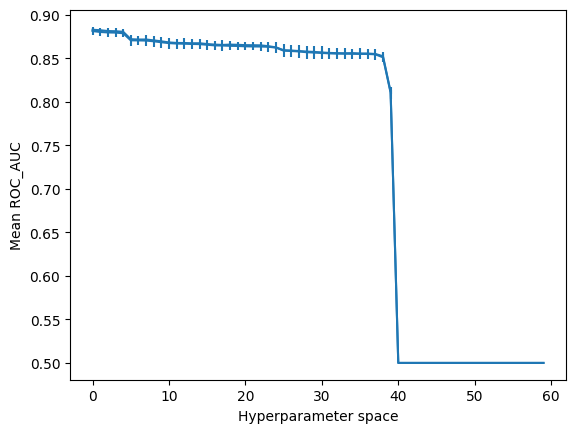

In [120]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [122]:
rf = RandomForestClassifier(max_depth=3, min_samples_split=0.0002725314913554211, n_estimators= 105, random_state=39)
rf.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_rf = rf.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_rf = rf.predict_proba(X_test_t_p6[sel_vars_2])
print('RF Train roc_auc: ', roc_auc_score(y_train, pred_train_rf[:,1]), 'RF Train GINI: ', 2*roc_auc_score(y_train, pred_train_rf[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)

RF Train roc_auc:  0.8822269555392914 RF Train GINI:  0.7644539110785828
RF Test roc_auc:  0.8777128038563013 RF Test GINI:  0.7554256077126027


### **Gradient Boosting**

In [123]:
# Seteamos el modelo
gbc = GradientBoostingClassifier(random_state=0)

# Determina el espacio de hiperparámetros
gbc_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# Búsqueda
reg_gbc = RandomizedSearchCV(gbc, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_gbc = reg_gbc.fit(X_train_t_p6[sel_vars_2], y_train)

# Obtiene mejores hiperparámetros
search_gbc.best_params_

{'max_depth': 4, 'min_samples_split': 0.07685550174624711, 'n_estimators': 155}

In [124]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 4, 'min_samples_split': 0.076855...",0.939194,0.000509,0.928342,0.002999
1,"{'max_depth': 3, 'min_samples_split': 0.048628...",0.935735,0.001205,0.926132,0.003865
2,"{'max_depth': 3, 'min_samples_split': 0.000272...",0.925177,0.000812,0.917404,0.004201
3,"{'max_depth': 3, 'min_samples_split': 0.030616...",0.924723,0.001781,0.917051,0.004724
4,"{'max_depth': 3, 'min_samples_split': 0.038460...",0.922485,0.000647,0.915930,0.004218
5,"{'max_depth': 4, 'min_samples_split': 0.327144...",0.921265,0.002194,0.915247,0.003527
6,"{'max_depth': 4, 'min_samples_split': 0.335499...",0.915344,0.001318,0.910906,0.004243
7,"{'max_depth': 3, 'min_samples_split': 0.140575...",0.916128,0.001827,0.910287,0.004023
8,"{'max_depth': 4, 'min_samples_split': 0.467403...",0.912769,0.000638,0.908637,0.004156
9,"{'max_depth': 2, 'min_samples_split': 0.131458...",0.912922,0.001457,0.908243,0.003697


Text(0.5, 0, 'Hyperparameter space')

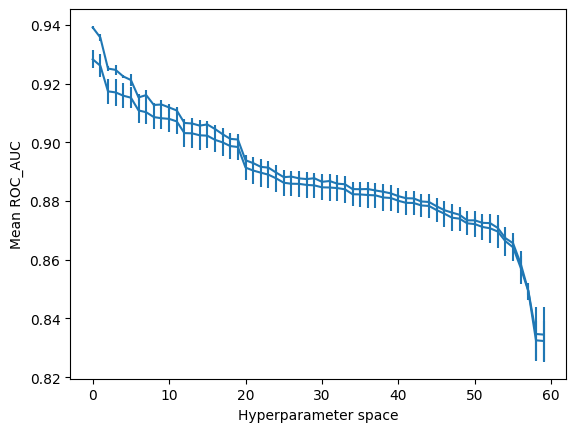

In [125]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [126]:
gbc = GradientBoostingClassifier(max_depth=4, min_samples_split=0.07685550174624711, n_estimators=155, random_state=44)
gbc.fit(X_train_t_p6[sel_vars_2], y_train)
pred_train_gbc = gbc.predict_proba(X_train_t_p6[sel_vars_2])
pred_test_gbc = gbc.predict_proba(X_test_t_p6[sel_vars_2])
print('GBC Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]), 'GBC Train GINI: ', 2*roc_auc_score(y_train, pred_train_gbc[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

GBC Train roc_auc:  0.9381597855239971 GBC Train GINI:  0.8763195710479943
GBC Test roc_auc:  0.9304247457698241 GBC Test GINI:  0.8608494915396483


### *Entonces, basado en sus rendimientos en test, cuál es el mejor modelo?*

In [127]:
print('Logit Test roc_auc: ', roc_auc_score(y_test, pred_test_logit[:,1]), 'Logit Test GINI: ', 2*roc_auc_score(y_test, pred_test_logit[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

Logit Test roc_auc:  0.8469446367711783 Logit Test GINI:  0.6938892735423565
RF Test roc_auc:  0.8777128038563013 RF Test GINI:  0.7554256077126027
GBC Test roc_auc:  0.9304247457698241 GBC Test GINI:  0.8608494915396483


#### FINALMENTE: Se puede apreciar una diferencia relevante entre los 3 modelos, en cuanto a performance, el GINI más alto es el correspondiente al Modelo de **Gradient Boosting**

## **6. Evaluación del Modelo**

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
br_test=y_test.value_counts() / len(y_test)
br_test

loan_status
0    0.78179
1    0.21821
Name: count, dtype: float64

In [130]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [132]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy GBC test:', accuracy_score(y_test, gbc.predict(X_test_t_p6[sel_vars_2])))

Accuracy Baseline test:  0.7817902813299232
Accuracy GBC test: 0.9149872122762148


In [133]:
from sklearn.metrics import (
    #accuracy_score,
    balanced_accuracy_score,
    recall_score,
)

In [134]:
print('Balanced accuracy, Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy, GBC test:',  balanced_accuracy_score(y_test,gbc.predict(X_test_t_p6[sel_vars_2])))

Balanced accuracy, Baseline test:  0.5
Balanced accuracy, GBC test: 0.8227782458648525


## Precision, Recall, F-measure, Support

- **Precision** = tp / (tp + fp)

- **Recall** = tp / (tp + fn)

- **F1** = 2 * (precision * recall) / (precision + recall)

- **Support** = Number of cases on each class

In [136]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
)

In [145]:
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, gbc.predict(X_test_t_p6[sel_vars_2]))

print('Precision: ', precision[1:])
print('Recall: ', recall[1:])
print('F1-score: ', fscore[1:])

Precision:  [0.93112583]
Recall:  [0.65916549]
F1-score:  [0.7718913]


### *Matriz de Confusión*

TN | FP

FN | TP

In [146]:
from sklearn.metrics import confusion_matrix

In [148]:
confusion_matrix(y_test, gbc.predict(X_test_t_p6[sel_vars_2]), labels=[0,1])

array([[7538,  104],
       [ 727, 1406]])

### *Identificamos un punto de corte óptimo que maximice el F1 Score*

In [149]:
from yellowbrick.classifier import (
    DiscriminationThreshold,
)

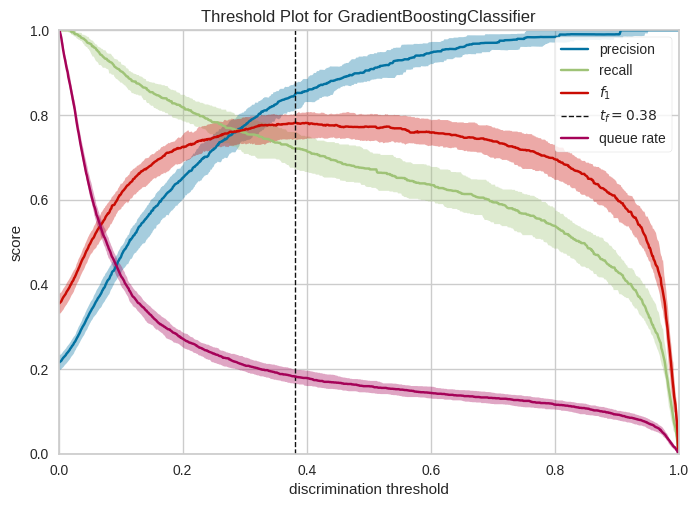

<Axes: title={'center': 'Threshold Plot for GradientBoostingClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [150]:
visualizer = DiscriminationThreshold(gbc, is_fitted=True, random_state=0, argmax='fscore')
visualizer.fit(X_test_t_p6[sel_vars_2], y_test)
visualizer.score(X_test_t_p6[sel_vars_2], y_test)
visualizer.show()

### *Adicionamos un cálculo de ROC*

In [152]:
from yellowbrick.classifier import ROCAUC

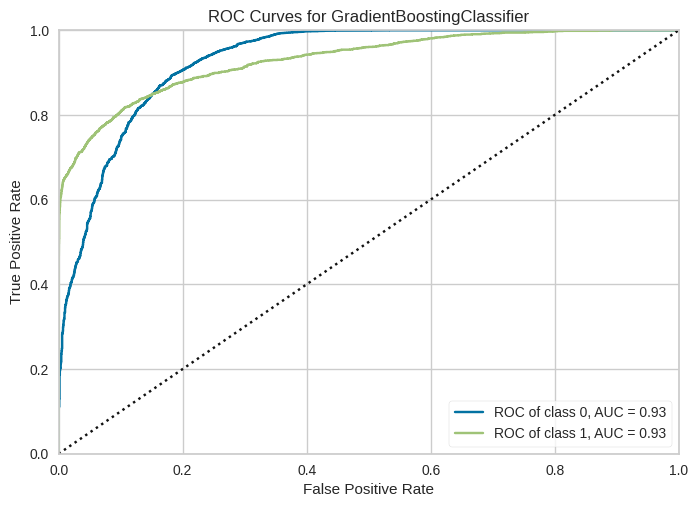

<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [153]:
visualizer2 = ROCAUC(gbc, is_fitted=True, micro=False, macro=False,)
visualizer2.fit(X_test_t_p6[sel_vars_2], y_test)
visualizer2.score(X_test_t_p6[sel_vars_2], y_test)
visualizer2.show()

### ***Técnicas de balanceo***
En este punto, propongamos algunos métodos de balanceo y revisemos su impacto en el performance del modelo candidato

In [171]:
X_y_train = pd.concat([X_train_t_p6[sel_vars_2].reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()
print(count_nondefault,count_default)

17831 4975


In [174]:
X_y_train.shape

(22806, 8)

In [172]:
# Separamos la muestra en 2 partes: defaults y no defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]
print(nondefaults.shape)
print(defaults.shape)

(17831, 8)
(4975, 8)


In [175]:
# Reducimos la muestra de nondefaults
nondefaults_under = nondefaults.sample(count_default)
print(nondefaults_under.shape)

(4975, 8)


In [176]:
# Unimos la muestra de defaults y la de nondefaults reducida
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Verificamos los nros de defaults y no defaults
print(X_y_train_under['loan_status'].value_counts())

loan_status
0    4975
1    4975
Name: count, dtype: int64


In [181]:
X_y_train_under.shape

(9950, 8)

In [180]:
X_train_rus=X_y_train_under.drop(columns='loan_status')
X_train_rus.head()

,loan_percent_income,loan_int_rate,person_income,person_home_ownership,cb_person_default_on_file,loan_intent,person_emp_length
0,-0.142857,0.646370,-0.615764,0.513736,0.785809,0.241034,-0.6
1,0.857143,0.538145,0.492611,0.513736,-0.212103,0.379096,-0.8
2,-0.357143,-0.297352,1.674877,0.513736,-0.212103,-0.270542,-0.8
3,-0.285714,-1.128521,0.147783,-0.690635,-0.212103,-0.270542,0.0
4,-0.500000,-0.297352,0.246305,0.513736,-0.212103,0.379096,-0.6


In [187]:
y_train_rus=X_y_train_under['loan_status']
y_train_rus.value_counts()

loan_status
0    4975
1    4975
Name: count, dtype: int64

In [188]:
# set up the model
gbc2 = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# search
reg_gbc2 = RandomizedSearchCV(gbc2, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_gbc2 = reg_gbc2.fit(X_train_rus, y_train_rus)

# best hyperparameters
search_gbc2.best_params_

{'max_depth': 4, 'min_samples_split': 0.07685550174624711, 'n_estimators': 155}

In [194]:
# Modelo GBC con balanceo y sin balanceo
pred_test_gbc = search_gbc.predict_proba(X_test_t_p6[sel_vars_2])
pred_test_gbc2 = search_gbc2.predict_proba(X_test_t_p6[sel_vars_2])
print('Sin Balanceo Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)
print('Con Balanceo Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc2[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc2[:,1])-1)

Sin Balanceo Test roc_auc:  0.9304247457698241 GINI Test  0.8608494915396483
Con Balanceo Test roc_auc:  0.92785538943679 GINI Test  0.85571077887358


## **8. Calibración del Modelo:**
En esta parte verificaremos, y de ser necesario, calibraremos el modelo revisando la relación entre los valores los ratios de default reales y las PDs promedios que arroja el modelo.

In [195]:
from sklearn.calibration import calibration_curve

In [196]:
# Veamos los RDs y los promedios de PDs en cada bucket para el modelo original (sin balanceo)
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, pred_test_gbc[:, 1], n_bins=10, strategy='uniform')

len(mean_predicted_value), len(fraction_of_positives)

(10, 10)

In [197]:
# Una función para consolidar lo anterior
def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, probs, n_bins=bins, strategy=strategy)

    max_val = max(mean_predicted_value)

    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='Logistic Regression')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')

    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    plt.title('Calibration Curve')
    plt.legend(loc='upper left')


    plt.subplot(2, 1, 2)
    plt.hist(probs, range=(0, 1), bins=bins, density=True, stacked=True, alpha=0.3)
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of examples')
    plt.title('Density')
    plt.show()

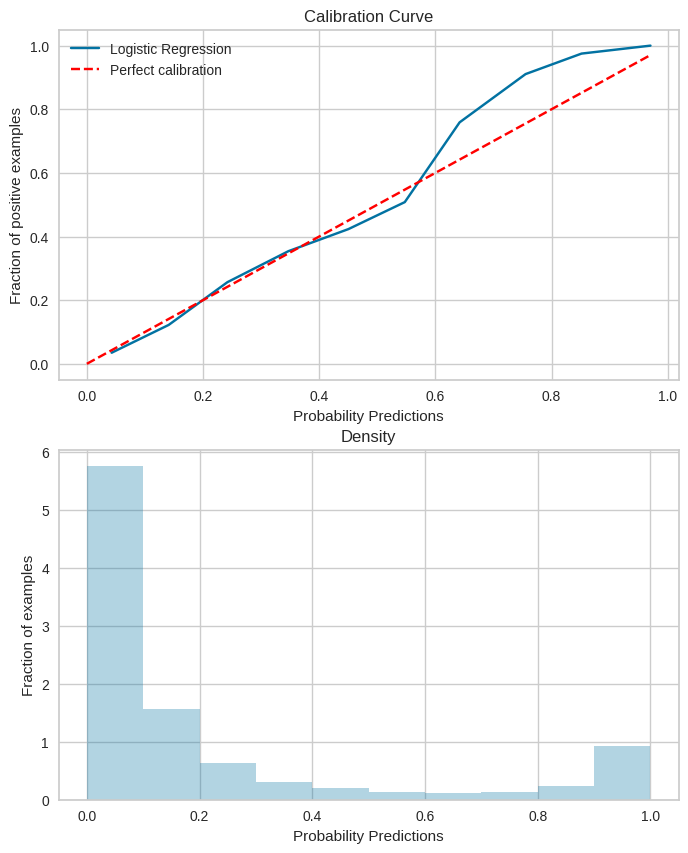

In [198]:
plot_calibration_curve(y_test, pred_test_gbc[:, 1], bins=10, strategy='uniform')

In [200]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, pred_test_gbc[:, 1])

0.06712092821910853

In [201]:
from sklearn.calibration import CalibratedClassifierCV

In [206]:
# Sobre el modelo original
# Calibración Sigmoide
cal_sigmoid = CalibratedClassifierCV(search_gbc, cv='prefit', method='sigmoid')
cal_sigmoid.fit(X_test_t_p6[sel_vars_2], y_test)
prob_sigmoid = cal_sigmoid.predict_proba(X_test_t_p6[sel_vars_2])[:, 1]

In [204]:
brier_score_loss(y_test, prob_sigmoid)

0.06665548523543274

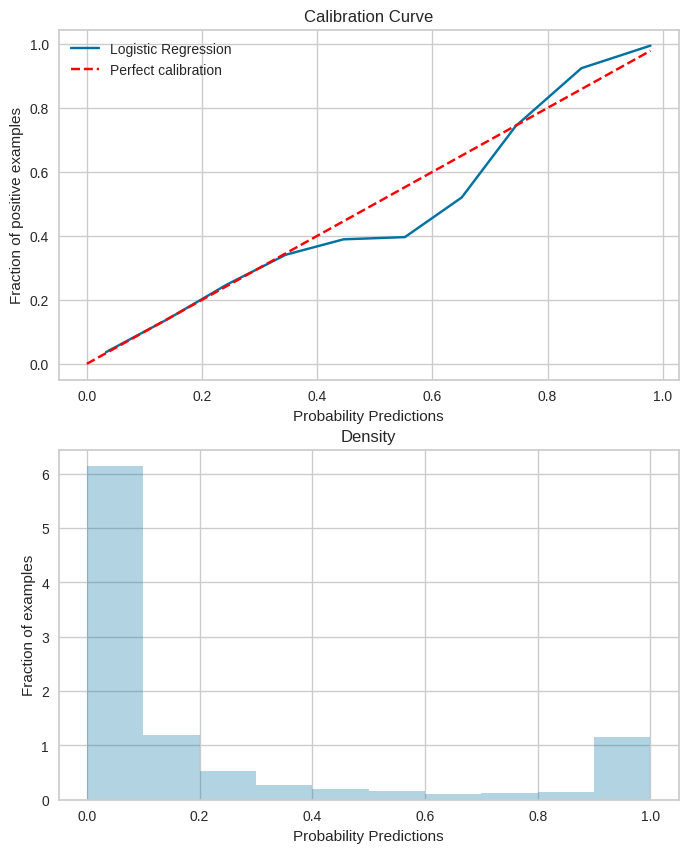

In [203]:
plot_calibration_curve(y_test, prob_sigmoid, bins=10, strategy='uniform')

In [207]:
# Calibración Isotónica
cal_isotonic = CalibratedClassifierCV(search_gbc, cv='prefit', method='isotonic')
cal_isotonic.fit(X_test_t_p6[sel_vars_2], y_test)
prob_isotonic = cal_isotonic.predict_proba(X_test_t_p6[sel_vars_2])[:, 1]

In [209]:
brier_score_loss(y_test, prob_isotonic)

0.0652696547782303

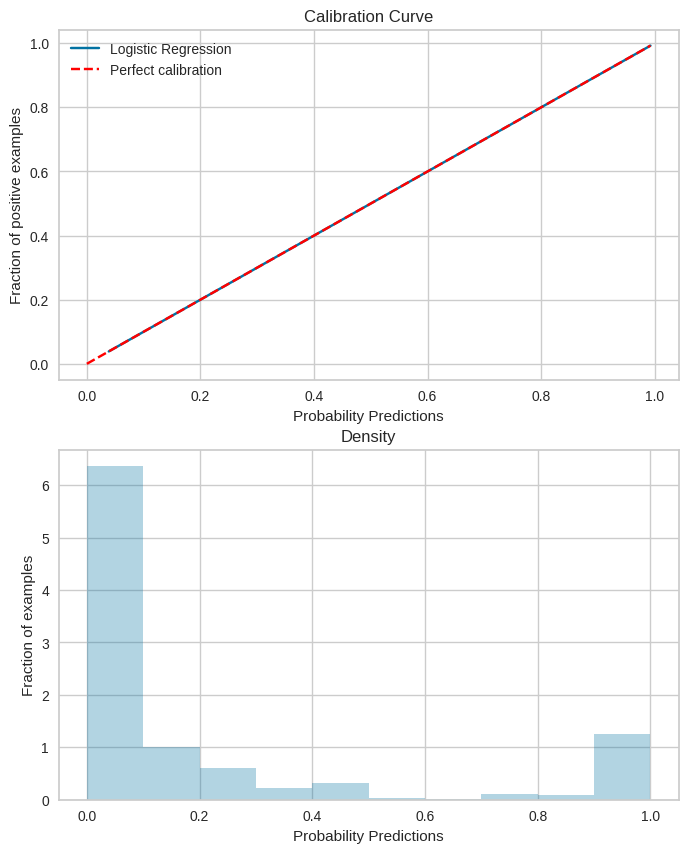

In [208]:
plot_calibration_curve(y_test, prob_isotonic, bins=10, strategy='uniform')

## **9. Unboxing de Modelos**

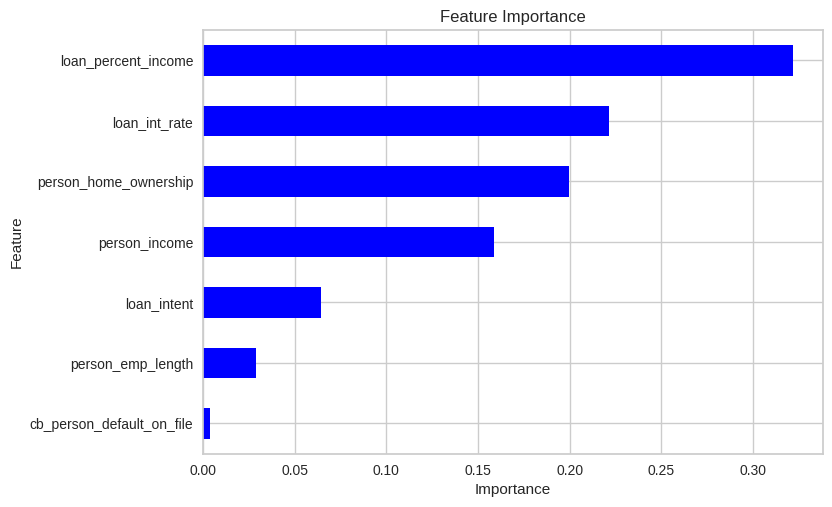

In [210]:
fi=pd.Series(gbc.feature_importances_,index=gbc.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

### Ahora realicemos un análisis de la importancia de las variables usando **SHAP**

In [211]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.1 MB/s eta 0:00:00


In [212]:
import shap

In [213]:
explainer = shap.Explainer(gbc)
shap_values_bin = explainer(X_test_t_p6[sel_vars_2])
print(shap_values_bin.shape)

(9775, 7)


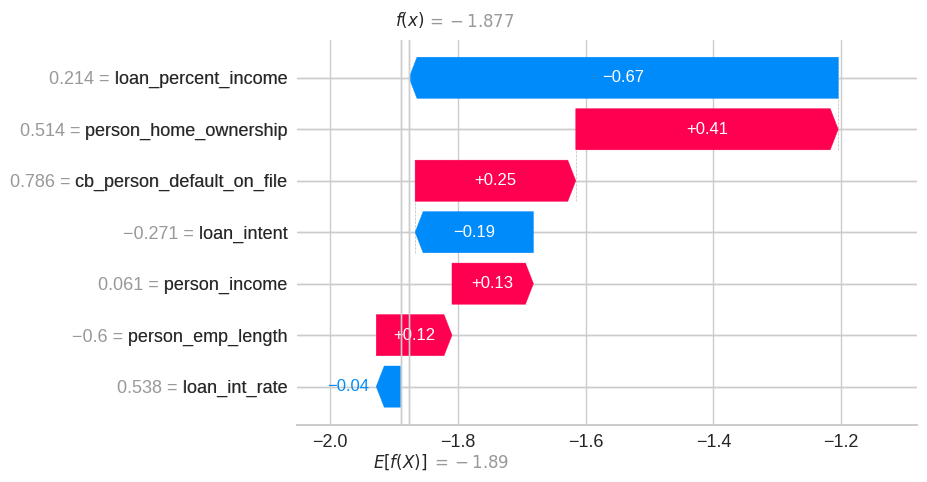

In [215]:
shap.plots.waterfall(shap_values_bin[0],max_display=10)

## **10. Pickling del Modelo y del Pipeline del Feature Engineering**

In [216]:
import pickle

In [217]:
# Empaquetamos el pipeline del feature engineering
with open('fe_pipeline.pickle','wb') as fe_data_file:
     pickle.dump(pipe_3,fe_data_file)

In [218]:
# Empaquetamos el modelo obtenido
with open('final_model.pickle','wb') as modelFile:
     pickle.dump(gbc,modelFile)

In [219]:
# Cargar el pipeline del feature engineering
with open('fe_pipeline.pickle','rb') as fe_data_file:
     fe_final = pickle.load(fe_data_file)

In [220]:
# Cargar el modelo
with open('final_model.pickle','rb') as modelFile:
     modelo_final = pickle.load(modelFile)

## ***FIN DEL TALLER, MUCHAS GRACIAS!!!***